In [7]:
import pandas as pd
import numpy as np

client_summary = pd.read_csv('../data/processed/client_summary.csv')
df = pd.read_csv('../data/processed/df_all_rows.csv')
df_filtered = pd.read_csv('../data/processed/df_clean.csv')

In [8]:
# Check balance: include both count and percentage columns
balance_counts = client_summary['quadrant'].value_counts().rename_axis('quadrant').reset_index(name='count')
balance_percent = client_summary['quadrant'].value_counts(normalize=True).rename_axis('quadrant').reset_index(name='percentage')
balance = pd.merge(balance_counts, balance_percent, on='quadrant')
(balance)

quadrant  count  percentage
0  HighTicket_Inefficient  22993    0.545517
1   LowTicket_Inefficient  19054    0.452063
2    HighTicket_Efficient     58    0.001376
3     LowTicket_Efficient     44    0.001044

In [9]:
client_summary

client_id channel       city  promotor_id  client_frequency  \
0      100006690      AR     Madrid    275609911               2.0   
1      100008050      AR  Barcelona    368568690               1.0   
2      100042162      HR  Barcelona    455263770               2.0   
3      100046227      AR  Barcelona    454554895               4.0   
4      100125158      HR      Cadiz    483340469               3.0   
...          ...     ...        ...          ...               ...   
42144  999934164      HR  Barcelona    480416490               2.0   
42145  999940211      AR  Barcelona    908993212               1.0   
42146  999940578      AR     Madrid    275609911               1.0   
42147  999941988      AR     Madrid    677360818               3.0   
42148  999976985      HR  Barcelona    996963848               3.0   

       total_orders  total_volume  total_income  median_ticket_year  \
0                22      1658.706       1494.53              60.990   
1                14      3982.000       1905.59             132.370   
2                18      1812.850       2243.30             128.125   
3                16      4590.180       2273.12             132.640   
4                26      1266.500       2204.24              67.255   
...             ...           ...           ...                 ...   
42144            23       691.000        785.30              38.330   
42145             3       557.820        260.55              76.430   
42146            13      1101.524       1044.61              64.315   
42147            36      5415.150       3828.31             102.840   
42148            30      1743.000       6988.48             211.830   

       median_ticket_min  ...  total_profit  median_efficiency_orders  \
0                  33.00  ...        614.53                      0.50   
1                  66.96  ...       1765.59                      1.00   
2                  29.62  ...       1263.30                      0.25   
3                  83.21  ...       1633.12                      0.50   
4                   0.00  ...       1579.24                      1.00   
...                  ...  ...           ...                       ...   
42144              25.55  ...        210.30                      1.00   
42145              75.02  ...        230.55                      1.00   
42146               0.00  ...        524.61                      0.50   
42147               0.00  ...       2418.31                      0.50   
42148              25.25  ...       6263.48                      1.00   

       median_efficiency_profit                quadrant  avg_orders_per_month  \
0                       10.4950   LowTicket_Inefficient              1.833333   
1                        1.0000  HighTicket_Inefficient              1.166667   
2                       20.9450  HighTicket_Inefficient              1.500000   
3                       46.3200  HighTicket_Inefficient              1.333333   
4                       45.2550   LowTicket_Inefficient              2.166667   
...                         ...                     ...                   ...   
42144                   13.3300   LowTicket_Inefficient              1.916667   
42145                    1.0000   LowTicket_Inefficient              0.250000   
42146                   12.1575   LowTicket_Inefficient              1.083333   
42147                   31.4200  HighTicket_Inefficient              3.000000   
42148                  198.8800  HighTicket_Inefficient              2.500000   

       avg_visits_per_month  visit_order_gap inefficiency_cost  \
0                  3.666667         1.833333             27.50   
1                  0.000000        -1.166667            -17.50   
2                  4.666667         3.166667             47.50   
3                  2.666667         1.333333             20.00   
4                  2.083333        -0.083333             -1.25   
...                     ...              ...               ...   
4

In [156]:
# client_summary.to_csv("data/processed/client_summary_with_quadrant.csv", index=False)

In [157]:
client_summary['visits_per_month'] = client_summary['total_promotor_visits'] / 12  # adjust period if needed

In [158]:
efficient_clients = client_summary[(client_summary['median_efficiency_orders'] > 1) & (client_summary['median_ticket_(eur)_year'] > 80)]

In [159]:
features = [
    'total_volume', 'total_income', 'total_profit',
    'median_ticket_(eur)_year', 'median_efficiency_orders',
    'median_efficiency_profit', 'total_promotor_calls', 'client_frequency'
]

In [160]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

X = efficient_clients[features]
y = efficient_clients['visits_per_month']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = XGBRegressor()
model.fit(X_train, y_train)

clients['predicted_visits_per_month'] = model.predict(clients[features])
clients['visit_gap'] = (clients['total_promotor_visits'] / 12) - clients['predicted_visits_per_month']

In [161]:
clients

client_id channel       city  promotor_id  client_frequency  \
0      100006690      AR     Madrid    275609911               2.0   
1      100008050      AR  Barcelona    368568690               1.0   
2      100042162      HR  Barcelona    455263770               2.0   
3      100046227      AR  Barcelona    454554895               4.0   
4      100125158      HR      Cadiz    483340469               3.0   
...          ...     ...        ...          ...               ...   
42144  999934164      HR  Barcelona    480416490               2.0   
42145  999940211      AR  Barcelona    908993212               1.0   
42146  999940578      AR     Madrid    275609911               1.0   
42147  999941988      AR     Madrid    677360818               3.0   
42148  999976985      HR  Barcelona    996963848               3.0   

       total_orders  total_volume  total_income  median_ticket_(eur)_year  \
0                22      1658.706       1494.53                    60.990   
1                14      3982.000       1905.59                   132.370   
2                18      1812.850       2243.30                   128.125   
3                16      4590.180       2273.12                   132.640   
4                26      1266.500       2204.24                    67.255   
...             ...           ...           ...                       ...   
42144            23       691.000        785.30                    38.330   
42145             3       557.820        260.55                    76.430   
42146            13      1101.524       1044.61                    64.315   
42147            36      5415.150       3828.31                   102.840   
42148            30      1743.000       6988.48                   211.830   

       median_ticket_(eur)_min  median_ticket_(eur)_max  \
0                        33.00                   123.89   
1                        66.96                   187.10   
2                        29.62                   220.82   
3                        83.21                   276.33   
4                         0.00                   173.95   
...                        ...                      ...   
42144                    25.55                    55.23   
42145                    75.02                   109.10   
42146                     0.00                   183.56   
42147                     0.00                   188.96   
42148                    25.25                   407.92   

       median_ticket_(eur)_std  total_promotor_visits  total_promotor_calls  \
0                    22.262210                     44                     0   
1                    38.756311                      0                    28   
2                    49.543046                     56                     0   
3                    48.602430                     32                    32   
4                    49.789599                     25                     0   
...                        ...                    ...                   ...   
42144                 9.544566                     23                    69   
42145                19.281958                      0                     0   
42146                41.173085                     26                     0   
42147                41.406391                     70                    70   
42148               106.655742                     29                     0   

       total_profit  median_efficiency_orders  median_efficiency_profit  \
0            614.53                      0.50                   10.4950   
1           1765.59                      1.00                    1.0000   
2           1263.30                      0.25                   20.9450   
3           1633.12                      0.50                   46.3200   
4           1579.24                      1.00                   45.2550   
...             ...                       ...                       ...   
42144        210.30                      1.00             

In [162]:
#average visit_gap

average_gap = clients['visit_gap'].mean()

average_gap

3.5986486657203254

In [163]:
clients['quadrant'].unique()

array(['LowValue_Inefficient', 'HighValue_Inefficient',
       'LowValue_Efficient', 'HighValue_Efficient'], dtype=object)

In [164]:
clients_optimize = clients[
    (clients['quadrant'] == 'LowValue_Efficient') |
    (clients['quadrant'] == 'LowValue_Inefficient')
]

clients_optimize

client_id channel       city  promotor_id  client_frequency  \
0      100006690      AR     Madrid    275609911               2.0   
4      100125158      HR      Cadiz    483340469               3.0   
5      100137028      AR     Murcia    733727842               2.0   
8      100175807      HR     Murcia    205150913               8.0   
11     100198216      AR     Madrid    358006057               1.5   
...          ...     ...        ...          ...               ...   
42138  999873719      AR    Granada    388409380               1.0   
42140  999883552      AR  Barcelona    496352806               3.5   
42144  999934164      HR  Barcelona    480416490               2.0   
42145  999940211      AR  Barcelona    908993212               1.0   
42146  999940578      AR     Madrid    275609911               1.0   

       total_orders  total_volume  total_income  median_ticket_(eur)_year  \
0                22      1658.706       1494.53                    60.990   
4                26      1266.500       2204.24                    67.255   
5                24      3930.000       1463.61                    61.070   
8                82      3694.530       4658.89                    46.500   
11                9       785.496        571.66                    63.310   
...             ...           ...           ...                       ...   
42138            14       889.450        991.53                    60.425   
42140            15      2426.390       1162.99                    67.730   
42144            23       691.000        785.30                    38.330   
42145             3       557.820        260.55                    76.430   
42146            13      1101.524       1044.61                    64.315   

       median_ticket_(eur)_min  median_ticket_(eur)_max  \
0                        33.00                   123.89   
4                         0.00                   173.95   
5                        52.72                    70.31   
8                        23.25                   168.26   
11                       52.22                    82.95   
...                        ...                      ...   
42138                    50.36                   183.10   
42140                    54.70                   156.61   
42144                    25.55                    55.23   
42145                    75.02                   109.10   
42146                     0.00                   183.56   

       median_ticket_(eur)_std  total_promotor_visits  total_promotor_calls  \
0                    22.262210                     44                     0   
4                    49.789599                     25                     0   
5                     6.678725                      0                    46   
8                    29.241659                      0                     0   
11                    8.739103                      9                     9   
...                        ...                    ...                   ...   
42138                34.609591                     28                     0   
42140                27.415118                     60                     0   
42144                 9.544566                     23                    69   
42145                19.281958                      0                     0   
42146                41.173085                     26                     0   

       total_profit  median_efficiency_orders  median_efficiency_profit  \
0            614.53                      0.50                   10.4950   
4           1579.24                      1.00                   45.2550   
5           1233.61                      1.00                    1.0000   
8           3858.89                      1.00                    1.0000   
11           346.66                      1.00                   38.3100   
...             ...                       ...                       ...   
42138        431.53                      0.50             

In [165]:
non_efficient = clients[clients['median_efficiency_orders'] < 1]
efficient_clients = clients[clients['median_efficiency_orders'] >= 1]

efficient_gap = efficient_clients['visit_gap'].mean()
inefficient_gap = non_efficient['visit_gap'].mean()

print(f"Efficient clients average absolute visit gap: {efficient_gap:.2f}")
print(f"Inefficient clients average absolute visit gap: {inefficient_gap:.2f}")

Efficient clients average absolute visit gap: 0.02
Inefficient clients average absolute visit gap: 7.20


/var/folders/lv/gn03ly3n62g1g9qqycdm72800000gn/T/ipykernel_33465/2356558328.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


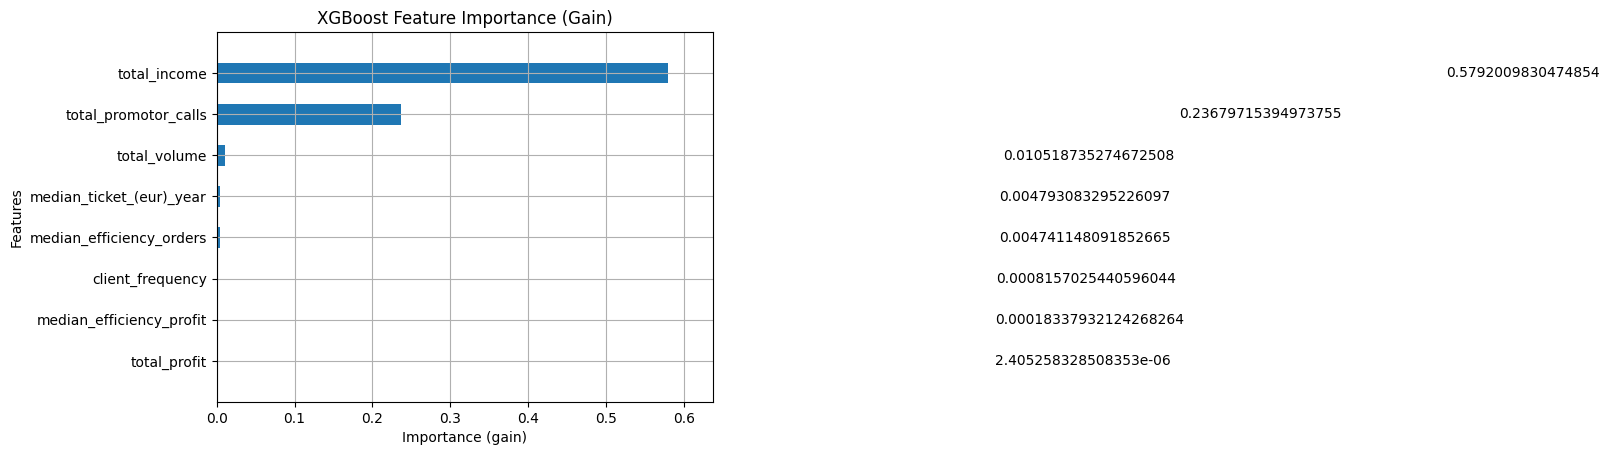

In [166]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(model, importance_type='gain', xlabel='Importance (gain)', height=0.5)
plt.title("XGBoost Feature Importance (Gain)")
plt.tight_layout()
plt.show()